In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
from matplotlib import rc

# activate latex text rendering
rc('text', usetex=True)

In [95]:
baseline_path = "datasets/baseline_dataset.csv"
events_path = "datasets/events_dataset.csv"
COLUMNS = ["hour", "minute", "last_tick", "type", "car_id", "last_link", "duration", "distance"]

baseline_df = (pd
    .read_csv(baseline_path, delimiter=";", header=None, names=COLUMNS)
    .assign(first_tick=lambda x: x['last_tick'] - x['duration']))

events_df = (pd
    .read_csv(events_path, delimiter=";", header=None, names=COLUMNS)
    .assign(first_tick=lambda x: x['last_tick'] - x['duration']))
...

Ellipsis

In [118]:
df1 = (baseline_df
        .groupby('last_link').mean().reset_index()[['last_link', 'distance', 'duration']]
        .assign(has_event=False))


df2 = (events_df
        .groupby('last_link').mean().reset_index()[['last_link', 'distance', 'duration']]
        .assign(has_event=True))

# renomeia os nós destinos
df1.loc[df1.last_link == 16, 'last_link'] = 3
df1.loc[df1.last_link == 53, 'last_link'] = 19
df1.loc[df1.last_link == 56, 'last_link'] = 20
df2.loc[df2.last_link == 16, 'last_link'] = 3
df2.loc[df2.last_link == 53, 'last_link'] = 19
df2.loc[df2.last_link == 56, 'last_link'] = 20

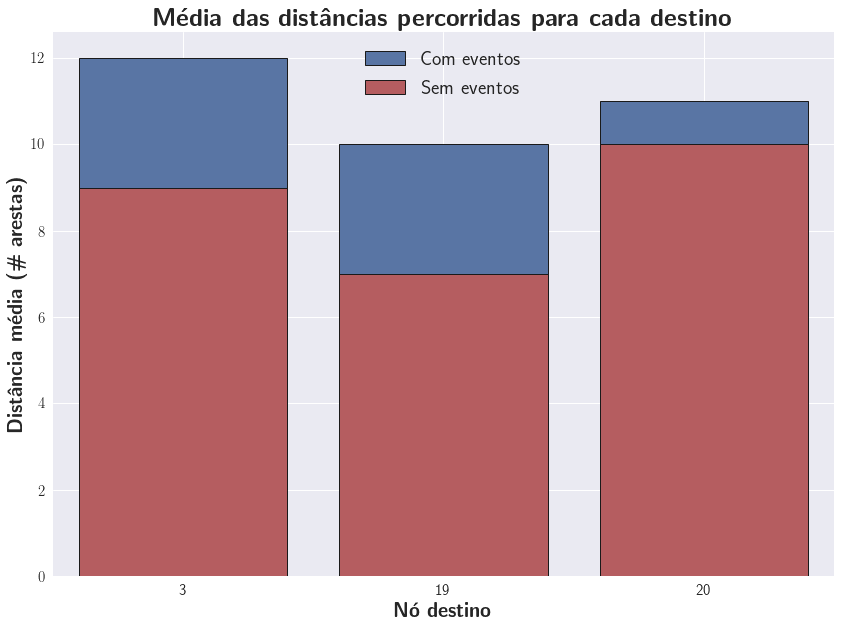

In [119]:
plt.figure(figsize=(14,10))
ax = sns.barplot(df2["last_link"],df2["distance"],linewidth=1,
            edgecolor="k"*len(df2),color="b",label="Com eventos")

sns.barplot(df1["last_link"],df1["distance"],linewidth=1,
            edgecolor="k"*len(df1),color="r",label="Sem eventos")

ax.set_xlabel(r'\textbf{N\'{o} destino}', fontsize='20')
ax.set_ylabel(r'\textbf{Dist\^ancia m\'edia (\# arestas)}', fontsize='20')

plt.legend(loc="best",prop={"size":20})
plt.title(r"\textbf{M\'edia das dist\^ancias percorridas para cada destino}", size=25)
plt.grid(True)
sns.set(font_scale = 1.5)

plt.show()

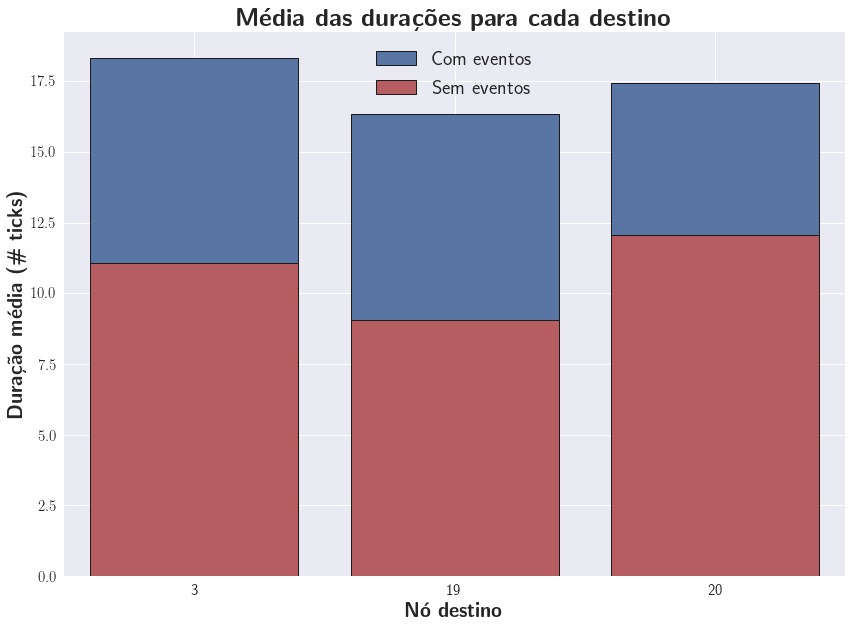

In [120]:
plt.figure(figsize=(14,10))
ax = sns.barplot(df2["last_link"],df2["duration"],linewidth=1,
            edgecolor="k"*len(df2),color="b",label="Com eventos")

sns.barplot(df1["last_link"],df1["duration"],linewidth=1,
            edgecolor="k"*len(df1),color="r",label="Sem eventos")

ax.set_xlabel(r'\textbf{N\'{o} destino}', fontsize='20')
ax.set_ylabel(r'\textbf{Dura\c{c}\~ao m\'edia (\# ticks)}', fontsize='20')

plt.legend(loc="best",prop={"size":20})
plt.title(r"\textbf{M\'edia das dura\c{c}\~oes para cada destino}", size=25)
plt.grid(True)
sns.set(font_scale = 1.5)

plt.show()